In [1]:
%matplotlib inline
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [6]:
!dir

 Volume in drive C is SPRAO
 Volume Serial Number is BE44-55A5

 Directory of C:\Users\sprao\Desktop\photos

08/06/2018  11:36 AM    <DIR>          .
08/06/2018  11:36 AM    <DIR>          ..
08/06/2018  11:32 AM    <DIR>          .ipynb_checkpoints
08/05/2018  08:03 PM         3,059,571 R0010002.JPG
08/06/2018  08:38 AM         3,225,849 R0010003.JPG
08/06/2018  09:59 AM         3,292,391 R0010004.JPG
08/06/2018  10:00 AM         2,933,928 R0010005.JPG
08/06/2018  10:00 AM         2,948,550 R0010006.JPG
08/06/2018  10:00 AM         2,887,101 R0010007.JPG
08/06/2018  11:36 AM               862 Untitled.ipynb
               7 File(s)     18,348,252 bytes
               3 Dir(s)  26,281,095,168 bytes free


In [6]:
image = mpimg.imread('R0010005.JPG')
(y,x,c) = image.shape
image = image[:,int(x/4):int(3*x/4),:]
image1 = mpimg.imread('R0010006.JPG')
image1 = image1[:,int(x/4):int(3*x/4),:]
image2 = mpimg.imread('R0010007.JPG')
image2 = image2[:,int(x/4):int(3*x/4),:]

(2688, 2688, 3)

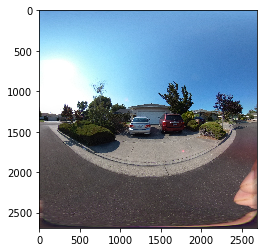

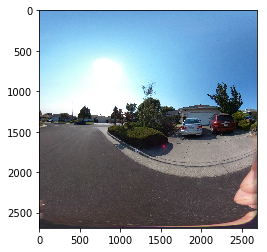

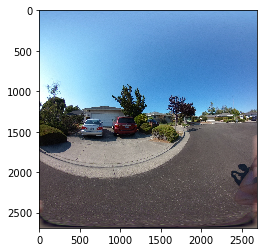

In [9]:
plt.imshow(image)
plt.figure()
plt.imshow(image1)
plt.figure()
plt.imshow(image2)
image.shape

In [79]:
def correction(image,strength=1, zoom=1):
    (height,width,chan) = image.shape
    halfWidth = width/2
    halfHeight = height/2
    #onebyk = 2*1.414/strength
    #mintheta = 0.5*onebyk
    newWidth = width #int(width/mintheta)
    newHeight = height #int(height/mintheta)
    newImage = np.zeros([newHeight,newWidth,3],dtype=np.uint8)
    print('destSize = ',newImage.shape)
    if strength == 0:
        strength = 0.00001
    corrRadius = np.sqrt(height*height + width*width)/strength
    for py in range(newHeight):
        for px in range(newWidth):
            pyd = py - int(newHeight)/2
            pxd = px - int(newWidth)/2
            mydist = np.sqrt(pyd*pyd + pxd*pxd)
            my_r = mydist/corrRadius
            if my_r==0:
                my_theta=1
            else:
                my_theta = np.arctan(my_r)/my_r
            sourceX = int(halfWidth + my_theta*pxd*zoom)
            sourceY = int(halfHeight + my_theta*pyd*zoom)   
            if sourceX < width and sourceY < height and sourceX >=0 and sourceY >=0:
                newImage[py,px,:] = image[sourceY,sourceX,:]        
    return newImage
        

In [96]:
newImage = correction(image,5,1)

destSize =  (2688, 2688, 3)


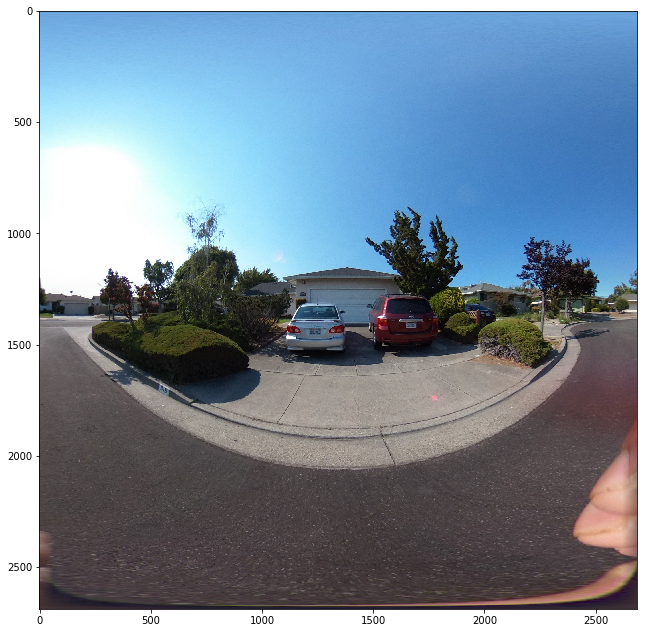

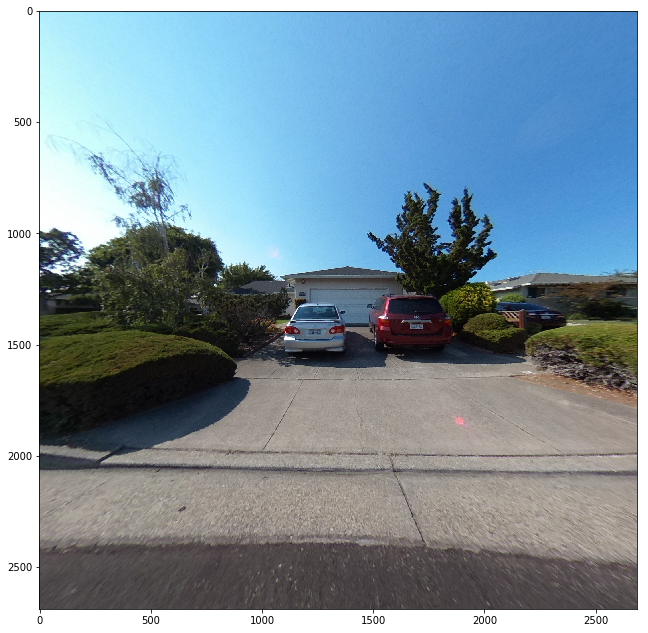

In [97]:
plt.figure(figsize = (11,11))
plt.imshow(image)
plt.figure(figsize = (11,11))
plt.imshow(newImage)

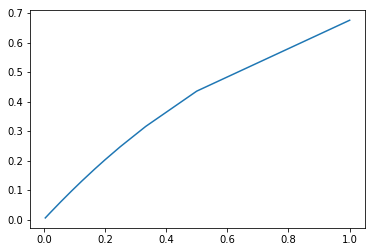

In [37]:
xnew = 1 #np.arange(0.000001,1,0.001)
k = np.arange(1,200,1)
ynew = 1 #np.arange(0.00001,1,0.001)
r = k*np.sqrt(xnew*xnew+ynew*ynew)
theta = np.arctan(r)/r
x = theta*xnew
plt.plot(1/k,theta)
    

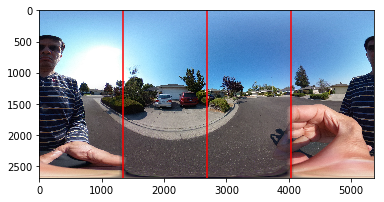

In [5]:
plt.figure
plt.imshow(image2)
plt.axvline(x/2,color='r')
plt.axvline(x/4,color='r')
plt.axvline(3*x/4,color='r')